In [89]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn import neighbors
from sklearn.cluster import KMeans
from pycaret.clustering import *

In [90]:
data = pd.read_csv('data/people_search.csv')

In [91]:
data.columns

Index(['Employee ID', 'Name', 'Gender', 'Role', 'Grade', 'Hire Date',
       'Home Office', 'Current Working Office', 'Staffing Office',
       'Total Years of EXP', 'TW Years of EXP', 'Skills'],
      dtype='object')

In [92]:
data.Role.describe()

count           308
unique           27
top       Developer
freq            171
Name: Role, dtype: object

In [93]:
data.Grade.describe()

count                   308
unique                   10
top       Senior Consultant
freq                    117
Name: Grade, dtype: object

In [94]:
data.Gender.describe()

count     308
unique      3
top       Man
freq      199
Name: Gender, dtype: object

In [95]:
data.Skills

0      [Expert]: Tamil;\n[Experienced]: Docker,Go CD,...
1      [Experienced]: English,Hindi;\n[Moderate]: C++...
2      [Expert]: Presenting,Teaching,English,Tamil;\n...
3                                                    NaN
4      [Expert]: Defect management,Manual/Exploratory...
                             ...                        
303                                                  NaN
304    [Experienced]: React,React Native,Redux ,Respo...
305    [Expert]: Tamil;\n[Experienced]: CSS,Feedback ...
306    [Experienced]: Defect management,Manual/Explor...
307                                                  NaN
Name: Skills, Length: 308, dtype: object

In [96]:
data.Skills.apply(lambda x:str(x).replace("[Expert]: ","").replace(";\n",",").replace("[Experienced]: ",""))

0      Tamil,Docker,Go CD,Golang,Java,Javascript,Node...
1      English,Hindi,[Moderate]: C++,HTML,Manual/Expl...
2      Presenting,Teaching,English,Tamil,ElasticSearc...
3                                                    nan
4      Defect management,Manual/Exploratory Testing,J...
                             ...                        
303                                                  nan
304    React,React Native,Redux ,Responsive Web Desig...
305    Tamil,CSS,Feedback & Coaching,English,[Moderat...
306    Defect management,Manual/Exploratory Testing,R...
307                                                  nan
Name: Skills, Length: 308, dtype: object

In [97]:
def return_column(skills_input,level):
    skill = list()
    skills = skills_input.replace(";\n","#$")
    if f"[{level}]: " in skills:
        replace_str = f"[{level}]: "
        curr_str_index = skills.find(replace_str)
        curr_end_index = skills.find("#$",curr_str_index)
        if curr_end_index == -1:
            skill.extend(skills[curr_str_index].replace(replace_str,"").split(","))
        else:
            skill.extend(skills[curr_str_index:curr_end_index].replace(replace_str,"").split(","))
    return skill

In [98]:
all_skills = []
for index, row in data.iterrows():
    skill_row = str(row['Skills'])
    all_skills.extend(return_column(skill_row,'Expert'))
    all_skills.extend(return_column(skill_row,'Moderate'))        
    all_skills.extend(return_column(skill_row,'Beginner'))        
    all_skills.extend(return_column(skill_row,'Experienced'))        
    all_skills.extend(return_column(skill_row,'Want to learn'))        

In [99]:
all_skills = list(set(all_skills))
all_skills.remove('[')

In [100]:
len(all_skills)

259

In [101]:
all_skills

['HTML',
 'Groovy test automation',
 'Requirements Analysis',
 'TDD - Test-Driven Development ',
 'GraphQL',
 'Negotiation',
 'Go',
 'Statistical Modeling',
 'Ruby on Rails',
 'Financial Services',
 'Javascript',
 'Other Functional',
 'Swift',
 'Concept Generation',
 'Build Pipelines',
 'Node JS',
 'Requirements Analysis & Backlog Management',
 'Teaching',
 'Rabbit MQ',
 'Usability Research',
 'JMeter ',
 'Planning',
 'Value Driven Portfolio Management (Edge)',
 'Telecommunications',
 'Iteration Management',
 'Fitnesse',
 'GitLab-CI',
 'PHP',
 'Java',
 'Presenting',
 'Real Estate & Construction',
 'ElasticSearch ',
 'Monitoring/Alerting',
 'C# test automation',
 'DynamoDB',
 'Communication',
 'Media',
 'Android',
 'React Native',
 'Education',
 'Vertica',
 'SASS/SCSS',
 'PowerShell ',
 'Wholesale & Distribution',
 'Boundary Analysis',
 'Neo4J',
 'Objective C',
 'SOAP',
 'Proposals',
 'Python',
 'Java application development',
 'Software defined networking',
 'Strategic Envisioning ',
 

In [102]:
skills_df = pd.DataFrame(np.zeros((data.shape[0],len(all_skills))),columns=all_skills)

In [103]:
people_skills = pd.concat([data,skills_df],axis=1)

In [104]:
def add_skill(row,skill_name,skill_level,skill_cols):
    skill_row = str(row['Skills'])
    skill_person = return_column(skill_row,skill_name)
    for skill in skill_person:
        if skill in skill_cols:
            row[skill] = skill_level
    return row

In [105]:
people_skills_map = people_skills.apply(lambda x: add_skill(x,'Expert',4,people_skills.columns),axis=1).apply(lambda x: add_skill(x,'Experienced',3,people_skills.columns),axis=1).apply(lambda x: add_skill(x,'Moderate',2,people_skills.columns),axis=1).apply(lambda x: add_skill(x,'Beginner',1,people_skills.columns),axis=1)

In [106]:
people_data = people_skills_map.drop(columns=['Home Office','Current Working Office','Staffing Office','Skills','Name','Hire Date'])

In [107]:
people_data.columns

Index(['Employee ID', 'Gender', 'Role', 'Grade', 'Total Years of EXP',
       'TW Years of EXP', 'HTML', 'Groovy test automation',
       'Requirements Analysis', 'TDD - Test-Driven Development ',
       ...
       'TeamCity', 'NoSQL', 'Mobile Development (Android / iOS / PhoneGap)',
       'Travel', 'Information Architecture Design',
       'Search Engine Optimization', 'Redis', 'Golang',
       'User Research & Customer Analysis', ' etc)'],
      dtype='object', length=265)

In [108]:
setup(people_data,normalize=True, normalize_method='minmax',pca=True,pca_components=0.7)

Setup Succesfully Completed!


,Description,Value
0,session_id,7669
1,Original Data,"(308, 265)"
2,Missing Values,False
3,Numeric Features,244
4,Categorical Features,21
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(308, 31)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


   
 305      0.309568      0.672255      0.202268      0.545702     -0.083217   
 306      0.694580      0.308677      0.006944     -0.195716     -0.081910   
 307      0.121918      0.111840      0.202755     -0.104141     -0.023066   
 
      Component_27  Component_28  Component_29  Component_30  Component_31  
 0        0.284533     -0.150387      0.355581     -0.315511      0.108283  
 1        0.119090     -0.277236     -0.283547     -0.235589      0.241731  
 2        0.535790      0.221462      0.002778     -0.182586     -0.005032  
 3       -0.103143      0.173642      0.047329     -0.005491      0.187224  
 4        0.495940     -0.331742     -0.245848     -0.232950      0.175581  
 ..            ...           ...           ...           ...           ...  
 303      0.045389     -0.087286      0.068994     -0.076842      0.323119  
 304     -0.323309      0.671270     -0.324089      0.174540     -0.551014  
 305     -0.114881     -0.100832      0.118779      0.262685      0

In [109]:
model = create_model('kmeans',num_clusters=4)

,Metric
Silhouette,0.1347
Calinski-Harabasz,35.2620
Davies-Bouldin,2.3245


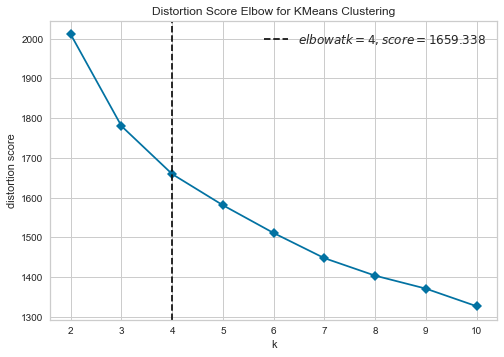

In [110]:
plot_model(model,plot='elbow') 

In [111]:
plot_model(model,plot='distribution') 

In [112]:
plot_model(model,plot='tsne') 

In [113]:
predictions = predict_model(model, data = people_data)

In [114]:
def get_match(emp_id):
    joined = pd.merge(data, predictions)
    cluster = joined[joined['Employee ID'] == emp_id]['Cluster'].values[0]
    return joined[joined['Cluster'] == cluster]['Name']

In [115]:
get_match(21824)

26           Arun Sundaralingam M
34                Balaji Arumugam
35               Balaji Sivakumar
36               Balaji Sivaraman
38           Balanagammal Murugan
41            Bharani Subramaniam
46                       Birlla P
54                Clement Lloyd P
59         Dharanikumar Premkumar
62                 Dinesh Kumar S
73         Ginette Thomas Vellera
74            Gobinath Thangavelu
79         Guruprasad Subramanian
90                Jagdsh LK Chand
91                   Jahan Arun J
111                     Kavitha R
146      Muralidharan Nandhakumar
165              Nithya Sivakumar
177              Prabhat Malhotra
192                 Rajagopal P S
218                    Saranraj S
229              Shakir A Shakiel
230          Shankar Ramakrishnan
244           Sooraj Parameswaran
258             Sriram Narasimhan
292                     Vignesh S
296    Vijay Raghavan Aravamudhan
298                 Vijayakumar G
299               Vijayaragavan G
300           

In [116]:
trf1 = ColumnTransformer(transformers =[ 
    ('cat', OneHotEncoder(), ['Gender','Role','Grade'])
], remainder ='passthrough') 

In [117]:
people_processed = MinMaxScaler().fit_transform(pd.get_dummies(people_data))

In [118]:
kmeans = KMeans(n_clusters=12)
kmeans.fit(people_processed)
kmeans.cluster_centers_

array([[ 9.02511748e-01,  1.37627196e-01,  3.66472608e-02, ...,
         0.00000000e+00,  0.00000000e+00,  4.28571429e-01],
       [ 6.62229961e-01,  2.13108976e-01,  1.80235856e-01, ...,
         2.85714286e-02,  1.71428571e-01,  1.42857143e-01],
       [ 8.57683531e-02,  8.18941504e-01,  7.61755486e-01, ...,
         5.00000000e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 7.58174053e-01,  2.46679531e-01,  1.30271485e-01, ...,
         7.54716981e-02,  5.66037736e-02,  2.83018868e-01],
       [ 4.68788739e-01,  5.55258112e-01,  2.84459010e-01, ...,
         9.09090909e-02, -6.93889390e-18,  9.09090909e-02],
       [ 4.46114979e-01,  3.79574041e-01,  2.87106447e-01, ...,
         4.34782609e-02,  0.00000000e+00,  7.39130435e-01]])